In [189]:
import pandas as pd

from nltk import word_tokenize,sent_tokenize

In [190]:
df=pd.read_csv('Data/spam.csv',encoding='latin-1')
df 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [191]:
if len(df.columns) > 2:
    df=df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [192]:
df=df.rename(columns={'v1':'Target','v2':'Message'})

In [193]:
df.drop_duplicates(inplace=True,keep='first')

In [194]:
vals=df['Target'].value_counts()

([<matplotlib.patches.Wedge at 0x307a0de50>,
 [Text(1.0144997251399075, -0.4251944351600248, 'ham'),
  Text(-1.1067270163085225, 0.46384837110076776, 'spam')],
 [Text(0.5533634864399495, -0.2319242373600135, '87.37'),
  Text(-0.6455907595133047, 0.27057821647544783, '12.63')])

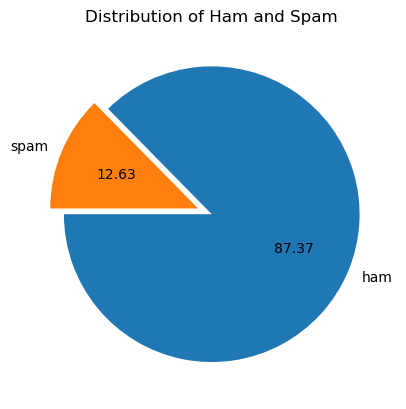

In [ ]:
from matplotlib import pyplot as plt
plt.title("Distribution of Ham and Spam")
plt.pie(vals,labels=vals.index,autopct="%0.2f",startangle=180,explode=[0,0.1])

In [196]:
df

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [197]:
df['characters']=df['Message'].apply(len)

In [198]:
#df['words']=df['Message'].apply(lambda x:len(x.split(' '))), it won't be able to separate punctuations from words

df['words']=df['Message'].apply(lambda x:len(word_tokenize(x)))

In [199]:
df['sentences']=df['Message'].apply(lambda x:len(sent_tokenize(x)))

In [203]:
df.groupby('Target').describe()

characters                                                           \
            count        mean        std   min    25%    50%    75%    max   
Target                                                                       
ham        4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0  910.0   
spam        653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0   

         words             ...              sentences                      \
         count       mean  ...   75%    max     count      mean       std   
Target                     ...                                              
ham     4516.0  17.123782  ...  22.0  220.0    4516.0  1.820195  1.383657   
spam     653.0  27.667688  ...  32.0   46.0     653.0  2.970904  1.488425   

                                  
        min  25%  50%  75%   max  
Target                            
ham     1.0  1.0  1.0  2.0  38.0  
spam    1.0  2.0  3.0  4.0   9.0  

[2 rows x 24 columns]